# ## General Assembly DAT11 Sydney - 26th Feb 2018 ##

## Visualising Data with Python


In [8]:
# Load the Iris dataset from CSV URL
# 1. Import the required libraries
import numpy as np
import pandas as pd
import urllib
import xlrd

# Display the plots in the notebook with the following command
%matplotlib inline
# Import the graphing libraries we will use
import matplotlib.pyplot as plt

### Visualising data in Python
This Section will deal with visualising data in Python. We will cover different graph types and how to interpret them.

In [3]:
# Read data from a csv
iris_data = pd.read_csv('../../../../data/iris.csv')
iris_data.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Remove the first 'Unnamed' Column:
iris_data = iris_data.iloc[:,1:6]
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48195800f0>]],
      dtype=object)

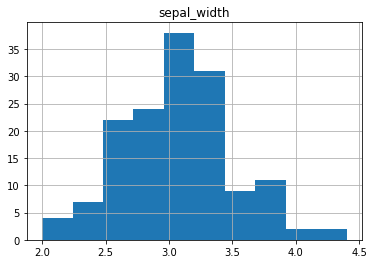

In [5]:
iris_data[['sepal_width']].hist()

In [23]:
# Install another Python library using pip
#! pip3 install seaborn # Already installed - don't need to do this!

In [6]:
import seaborn as sns
sns.set(color_codes=True)

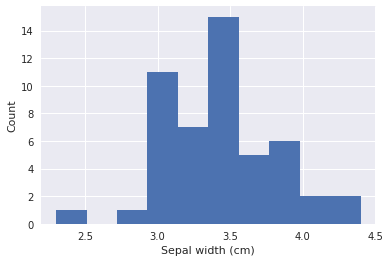

In [9]:
iris_data.loc[iris_data['species'] == 'setosa', 'sepal_width'].hist()
plt.xlabel("Sepal width (cm)")
plt.ylabel("Count")
plt.show()

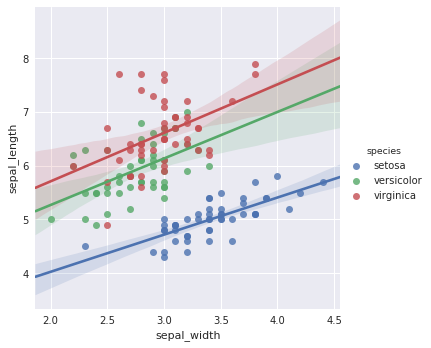

In [10]:
# Draw a Scatterplot showing sepal width and length
sns.lmplot(x='sepal_width', y="sepal_length", hue="species", data=iris_data, fit_reg=True)
#iris_data.plot(kind='scatter', x='sepal_width', y='sepal_length');

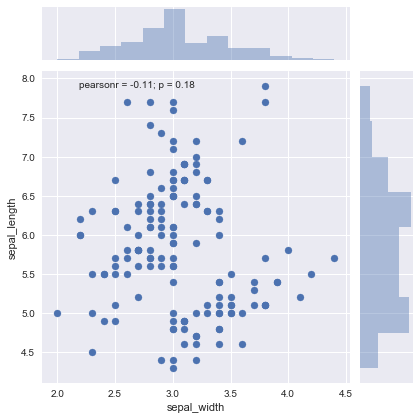

In [27]:
sns.jointplot(x="sepal_width", y="sepal_length", data=iris_data);

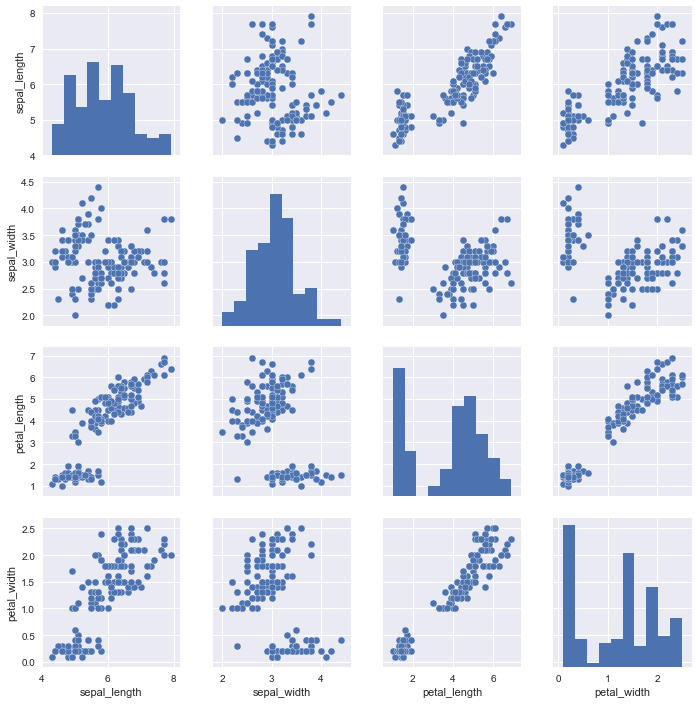

In [28]:
sns.pairplot(iris_data);

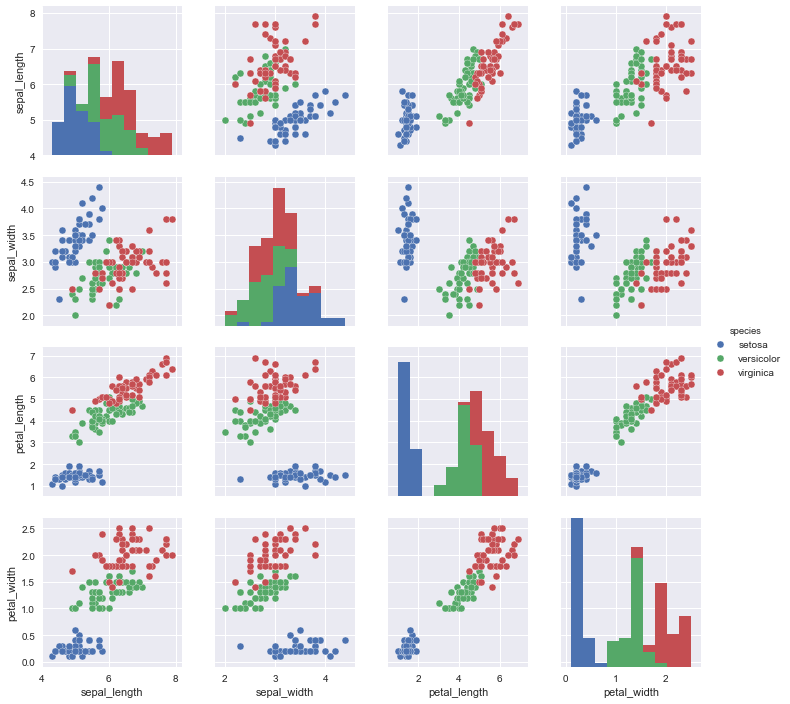

In [29]:
sns.pairplot(iris_data, hue='species');

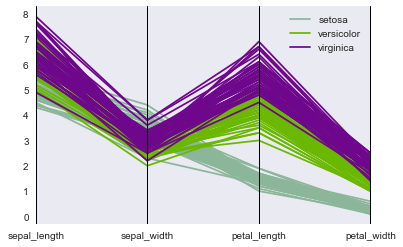

In [31]:
from pandas.plotting import parallel_coordinates
parallel_coordinates (iris_data, 'species')

### Plotly
A nice open source library for interactive visualisations

In [33]:
# To run any command at the system shell, simply prefix it with !
# pip won't work from inside python without it
#!pip install plotly --upgrade

In [17]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

print(__version__) # requires version >= 1.9.0

2.4.1


In [1]:
import plotly
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": Layout(title="hello world")
})

In [3]:
import plotly as py
import plotly.figure_factory as ff
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

table = ff.create_table(df)
plotly.offline.iplot(table, filename='jupyter/table1')

In [4]:
import plotly.plotly as py
from plotly.graph_objs import *

data = [Bar(x=df.School,
            y=df.Gap)]

plotly.offline.iplot(data, filename='jupyter/basic_bar')

In [6]:

import plotly.plotly as py
from plotly.graph_objs import *

trace_women = Bar(x=df.School,
                  y=df.Women,
                  name='Women',
                  marker=dict(color='#ffcdd2'))

trace_men = Bar(x=df.School,
                y=df.Men,
                name='Men',
                marker=dict(color='#A2D5F2'))

trace_gap = Bar(x=df.School,
                y=df.Gap,
                name='Gap',
                marker=dict(color='#59606D'))

data = [trace_women, trace_men, trace_gap]
layout = Layout(title="Average Earnings for Graduates",
                xaxis=dict(title='School'),
                yaxis=dict(title='Salary (in thousands)'))
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, filename='jupyter/styled_bar')

In [9]:
# Scatter plot with heatmap
x = np.random.randn(2000)
y = np.random.randn(2000)
plotly.offline.iplot([Histogram2dContour(x=x, y=y, contours=Contours(coloring='heatmap')),
       Scatter(x=x, y=y, mode='markers', marker=Marker(color='white', size=3, opacity=0.3))], show_link=False)

In [11]:
# Load airport data

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

,iata,airport,city,state,country,lat,long,cnt
0,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,25129
1,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,21925
2,DFW,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200,20662
3,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,17290
4,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002,13781


In [12]:
# Load flight path data

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

,start_lat,start_lon,end_lat,end_lon,airline,airport1,airport2,cnt
0,32.895951,-97.037200,35.040222,-106.609194,AA,DFW,ABQ,444
1,41.979595,-87.904464,30.194533,-97.669872,AA,ORD,AUS,166
2,32.895951,-97.037200,41.938874,-72.683228,AA,DFW,BDL,162
3,18.439417,-66.001833,41.938874,-72.683228,AA,SJU,BDL,56
4,32.895951,-97.037200,33.562943,-86.753550,AA,DFW,BHM,168


In [14]:
airports[0]

{'hoverinfo': 'text', 'lat': 0      41.979595
 1      33.640444
 2      32.895951
 3      33.434167
 4      39.858408
 5      29.980472
 6      37.619002
 7      33.942536
 8      28.428889
 9      35.214011
 10     40.788388
 11     27.975472
 12     40.692497
 13     36.080361
 14     39.871953
 15     44.880547
 16     47.448982
 17     40.777243
 18     41.785983
 19     38.944532
 20     32.733556
 21     38.747687
 22     42.212059
 23     40.639751
 24     25.793250
 25     42.364348
 26     38.695422
 27     39.175402
 28     33.675659
 29     29.993389
          ...    
 191    47.482002
 192    32.333133
 193    46.353639
 194    37.953759
 195    35.035268
 196    46.374498
 197    37.700970
 198    42.748119
 199    44.473004
 200    48.311405
 201    28.102750
 202    29.179917
 203    40.652363
 204    46.842090
 205    41.155722
 206    41.594217
 207    37.858306
 208    38.373151
 209    48.792750
 210    37.624049
 211    44.257408
 212    36.385913
 213    27.910763


In [10]:
# Mapping

airports = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_airports['long'], # longitude column from airports
        lat = df_airports['lat'], # latitude column from airports
        hoverinfo = 'text',
        text = df_airports['airport'], # airport name from airports
        mode = 'markers',
        marker = dict(
            size=2,
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]

flight_paths = []
for i in range( len( df_flight_paths ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i] ],
            lat = [ df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            opacity = float(df_flight_paths['cnt'][i])/float(df_flight_paths['cnt'].max()),
        )
    )

layout = dict(
        title = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
        showlegend = False,
        height = 800,
        geo = dict(
            scope='north america',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )

fig = dict( data=flight_paths + airports, layout=layout )

plotly.offline.iplot(fig)